In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt

In [18]:
file = 'bugatti_start.wav'
song = wave.open(file, 'r')

raw_signal = song.readframes(-1)
# we guessed int32 so that the signal and the song will have the same number of frames
signal = np.frombuffer(raw_signal, 'int32')

print(f'Number of frames: {song.getnframes()}')
print(f'Length of signal list: {len(signal)}')
print(f'Length of audio: {song.getnframes() / song.getframerate()}') 

Number of frames: 288855
Length of signal list: 288855
Length of audio: 6.55


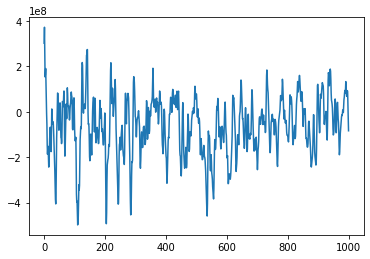

In [24]:
# signal looks like how we'd want to display a car starting up (for now)
plt.figure(1)
plt.plot(signal)

In [25]:
import curses
import time

stdscr = curses.initscr()

# turn off keys from echoing in terminal
curses.noecho()

pad = curses.newpad(100, 100)
for y in range(0, 99):
	for x in range(0, 99):
		pad.addch(y,x, ord('a') + (x*x+y*y) % 26)

pad.refresh( 0,0, 5,5, 20,75)
time.sleep(10)

# close out
curses.nocbreak()
stdscr.keypad(False)
curses.echo()


)07abejqzkxmdwronorwdmxkzqjebabejqzkxmdwronorwdmxkzqjebabejqzkxmdwronorwdmbcfkralynexspopsxenylarkfcbcfkralynexspopsxenylarkfcbcfkralynexspopsxenefinudobqhavsrsvahqbodunifefinudobqhavsrsvahqbodunifefinudobqhavsrsvahqjknszitgvmfaxwxafmvgtizsnkjknszitgvmfaxwxafmvgtizsnkjknszitgvmfaxwxafmvqruzgpanctmhedehmtcnapgzurqruzgpanctmhedehmtcnapgzurqruzgpanctmhedehmtczadipyjwlcvqnmnqvclwjypidazadipyjwlcvqnmnqvclwjypidazadipyjwlcvqnmnqvclklotajuhwngbyxybgnwhujatolklotajuhwngbyxybgnwhujatolklotajuhwngbyxybgnwxybgnwhujatolklotajuhwngbyxybgnwhujatolklotajuhwngbyxybgnwhujatolklotajmnqvclwjypidazadipyjwlcvqnmnqvclwjypidazadipyjwlcvqnmnqvclwjypidazadipydehmtcnapgzurqruzgpanctmhedehmtcnapgzurqruzgpanctmhedehmtcnapgzurqruzgpwxafmvgtizsnkjknszitgvmfaxwxafmvgtizsnkjknszitgvmfaxwxafmvgtizsnkjknszirsvahqbodunifefinudobqhavsrsvahqbodunifefinudobqhavsrsvahqbodunifefinudopsxenylarkfcbcfkralynexspopsxenylarkfcbcfkralynexspopsxenylarkfcbcfkranorwdmxkzqjebabejqzkxmdwronorwdmxkzqjebabejqzkxmdwronorwdmxkzqjebabejqzo

error: nocbreak() returned ERR

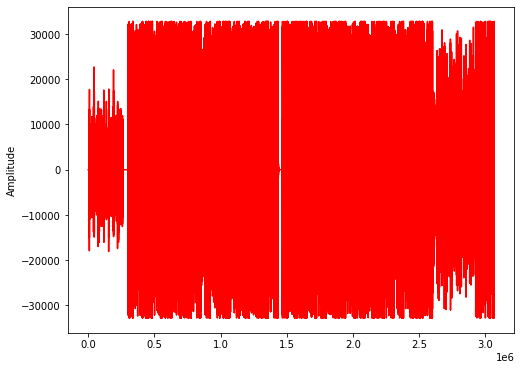

In [83]:
song = wave.open(f'audio/celsius_test.wav', 'r')

sampling_rate = song.getframerate()
sampling_interval = 1.0 / sampling_rate

t = np.arange(0, song.getnframes(), 1)

signal = song.readframes(-1)
# celsius test is int16 for some reason
signal = np.frombuffer(signal, "int16")

plt.figure(figsize = (8, 6))
plt.plot(t, signal, 'r')
plt.ylabel('Amplitude')

plt.show()

In [96]:
from numpy.fft import fft, ifft

X = fft(signal)
N = len(X)
n = np.arange(N)
T = N/sampling_rate
freq = n/T

/var/folders/y7/rdkd1_7d3b9fjykc4g2vvjl00000gn/T/ipykernel_85345/2002687950.py:4: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b',
/Users/declannelson/miniconda3/envs/jukebox/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


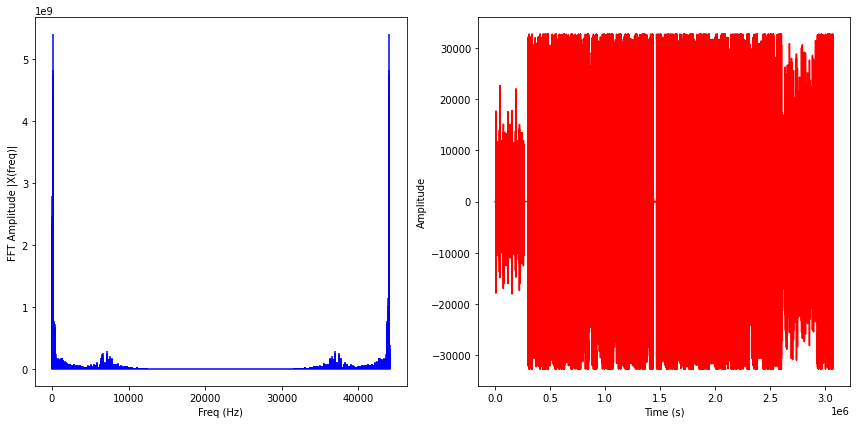

In [97]:
plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b',
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 100)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [86]:
len(signal)

3066624

In [79]:
window_rate = 1 # 10 windows per second

audio_length = song.getnframes() / song.getframerate()
frames_per_window = song.getframerate() / window_rate
frame_windows = audio_length * window_rate

frame_windows
frames_list = np.array_split(signal, frame_windows)

[ 4.85615201e+10+0.00000000e+00j -8.76017356e+10-5.26079865e+09j
  9.48919364e+10-6.79984251e+10j ... -3.69027612e+10-8.29500979e+10j
  9.48919364e+10+6.79984251e+10j -8.76017356e+10+5.26079865e+09j]


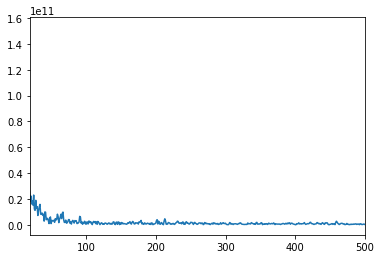

[ 4.54417030e+10+0.00000000e+00j -1.16739238e+11+9.36190956e+10j
  1.81483707e+11-1.14412470e+11j ... -1.97104264e+10+3.50187809e+10j
  1.81483707e+11+1.14412470e+11j -1.16739238e+11-9.36190956e+10j]


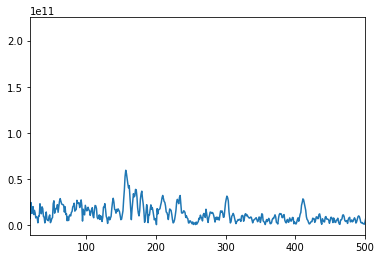

[-2.93961618e+10+0.00000000e+00j -3.47123051e+09+1.26606151e+11j
 -8.67702664e+09-1.14651660e+10j ...  7.90909866e+10-8.01949860e+10j
 -8.67702664e+09+1.14651660e+10j -3.47123051e+09-1.26606151e+11j]


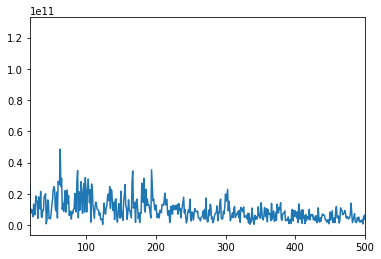

[ 1.91442942e+10+0.00000000e+00j  1.32989866e+11+4.14692960e+10j
 -1.27760105e+11-1.34120596e+11j ... -1.40940414e+11+4.50450392e+10j
 -1.27760105e+11+1.34120596e+11j  1.32989866e+11-4.14692960e+10j]


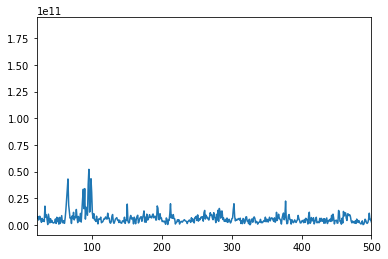

[ 1.35660681e+09+0.00000000e+00j  1.21302251e+11+1.35102097e+11j
  3.24592565e+10-1.02056007e+11j ... -1.96739384e+10+8.52366687e+09j
  3.24592565e+10+1.02056007e+11j  1.21302251e+11-1.35102097e+11j]


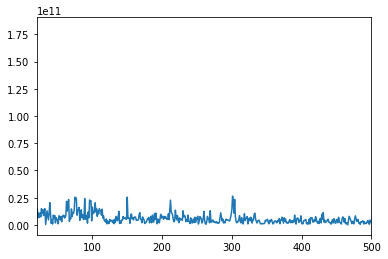

[-1.03786109e+10+0.00000000e+00j  1.50760112e+11+3.62218470e+10j
  5.72510247e+10+1.60198681e+11j ... -1.94931057e+10-9.81406392e+09j
  5.72510247e+10-1.60198681e+11j  1.50760112e+11-3.62218470e+10j]


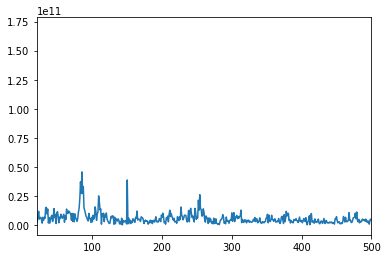

[ 6.12005558e+10+0.00000000e+00j  1.51935065e+11+8.72816771e+10j
 -5.60198554e+10+4.50279400e+10j ... -7.61660450e+10+8.63336332e+10j
 -5.60198554e+10-4.50279400e+10j  1.51935065e+11-8.72816771e+10j]


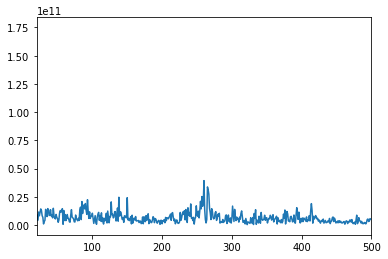

[-5.65855332e+10+0.00000000e+00j  8.15872545e+10+9.05604136e+10j
 -1.24529230e+10-2.97153958e+10j ...  4.42146721e+10-6.75796228e+10j
 -1.24529230e+10+2.97153958e+10j  8.15872545e+10-9.05604136e+10j]


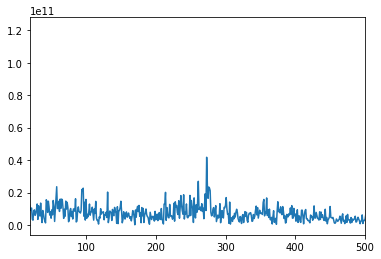

[-8.75694152e+10+0.00000000e+00j -8.07204654e+10+2.17181306e+10j
 -9.06705964e+10-6.94207090e+10j ... -2.40728930e+11+1.26443884e+11j
 -9.06705964e+10+6.94207090e+10j -8.07204654e+10-2.17181306e+10j]


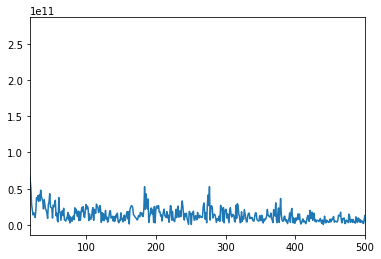

[6.57009422e+10+0.00000000e+00j 1.05464603e+11+9.25961914e+10j
 2.09033741e+11+1.22484014e+10j ... 1.01277598e+11+3.58253528e+10j
 2.09033741e+11-1.22484014e+10j 1.05464603e+11-9.25961914e+10j]


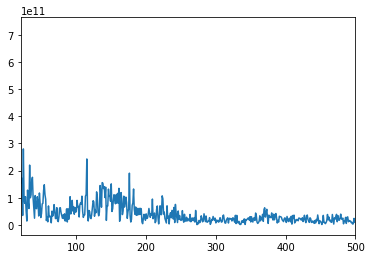

[ 1.20702364e+10+0.00000000e+00j -1.85841493e+10-5.14417787e+10j
 -1.61433276e+10-2.88041334e+10j ...  2.82395720e+10+1.07281764e+11j
 -1.61433276e+10+2.88041334e+10j -1.85841493e+10+5.14417787e+10j]


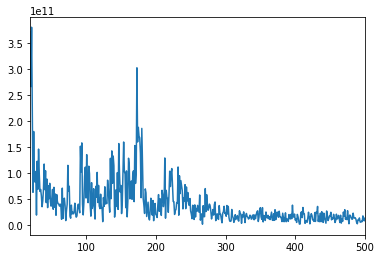

[-1.39486765e+10+0.00000000e+00j -3.51118089e+10-3.53408207e+10j
 -3.46364379e+10-1.73033705e+09j ... -3.52718796e+10-1.58134840e+09j
 -3.46364379e+10+1.73033705e+09j -3.51118089e+10+3.53408207e+10j]


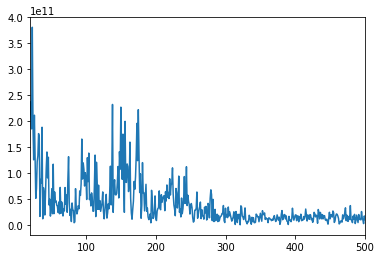

[1.30997169e+10+0.00000000e+00j 2.49739295e+08-2.02586991e+10j
 8.36298500e+09-3.19648760e+09j ... 1.59496774e+09-2.52335113e+09j
 8.36298500e+09+3.19648760e+09j 2.49739295e+08+2.02586991e+10j]


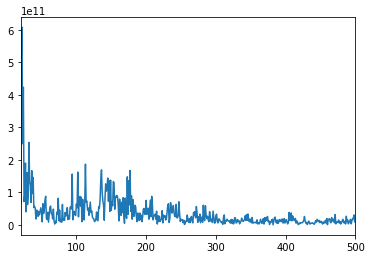

[-1.76690423e+10+0.00000000e+00j -4.92002575e+09-3.26819992e+10j
  3.12334599e+10+8.56719072e+09j ... -9.24386764e+08-7.53711218e+09j
  3.12334599e+10-8.56719072e+09j -4.92002575e+09+3.26819992e+10j]


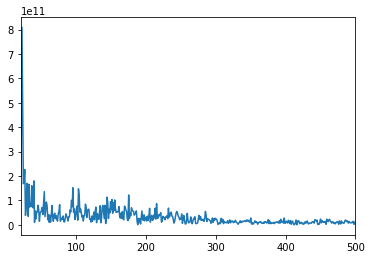

[ 2.24886166e+10+0.00000000e+00j  4.23327283e+10-1.01167860e+10j
 -1.40609999e+10-8.39152418e+09j ...  1.30699993e+10-3.68735635e+10j
 -1.40609999e+10+8.39152418e+09j  4.23327283e+10+1.01167860e+10j]


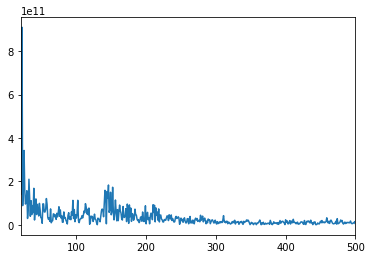

[2.54347185e+09+0.00000000e+00j 2.27103545e+10-8.71176624e+09j
 9.47665563e+09-1.79051378e+10j ... 9.60189649e+09+2.16596038e+10j
 9.47665563e+09+1.79051378e+10j 2.27103545e+10+8.71176624e+09j]


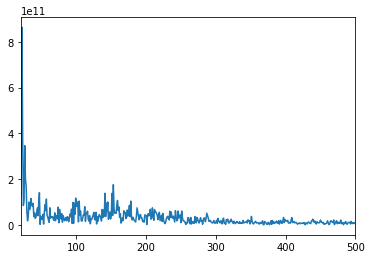

[-2.17351149e+10+0.00000000e+00j -2.06952081e+10+2.48643284e+10j
 -2.21877092e+10-1.36040833e+10j ... -3.30280885e+10-4.07198111e+10j
 -2.21877092e+10+1.36040833e+10j -2.06952081e+10-2.48643284e+10j]


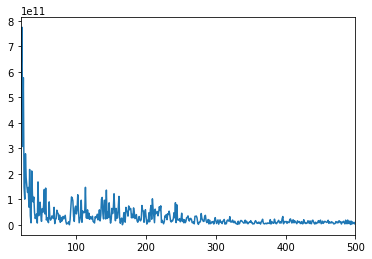

[3.56631691e+10+0.00000000e+00j 3.97075469e+10+1.27518189e+10j
 3.66275983e+10-1.16610421e+10j ... 2.33183076e+10+6.60448169e+08j
 3.66275983e+10+1.16610421e+10j 3.97075469e+10-1.27518189e+10j]


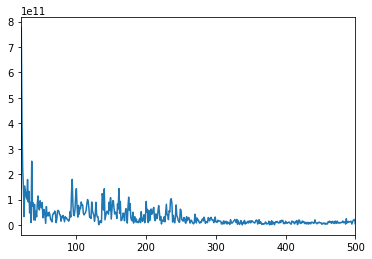

[-4.23943538e+10+0.00000000e+00j -6.04400939e+10+3.51550666e+10j
 -4.29964783e+10+4.70707738e+09j ... -7.08258792e+10-2.21684549e+10j
 -4.29964783e+10-4.70707738e+09j -6.04400939e+10-3.51550666e+10j]


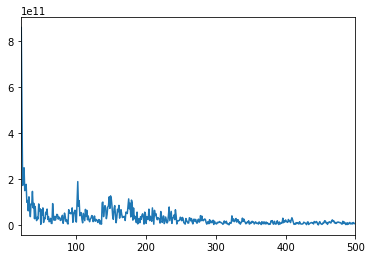

[3.23046976e+10+0.00000000e+00j 2.22018060e+10+4.45733678e+10j
 2.49962467e+10-4.58288674e+09j ... 3.12397010e+10-7.13084384e+09j
 2.49962467e+10+4.58288674e+09j 2.22018060e+10-4.45733678e+10j]


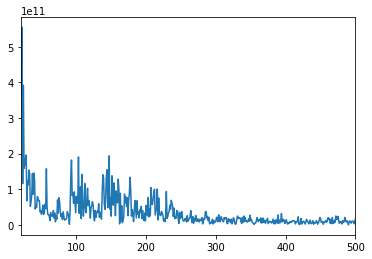

[ 3.23226831e+10+0.00000000e+00j  2.98614200e+10+1.03056887e+10j
  1.71127941e+10-7.21588422e+09j ... -5.00777062e+09-1.89495194e+10j
  1.71127941e+10+7.21588422e+09j  2.98614200e+10-1.03056887e+10j]


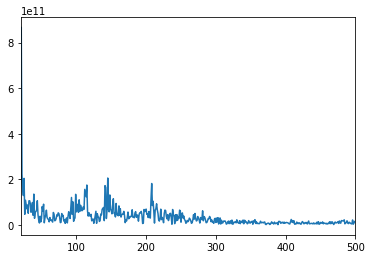

[-4.88192719e+10+0.00000000e+00j -1.78109245e+10+1.22409626e+10j
 -1.23945135e+10+2.77320625e+09j ... -2.21468040e+10+8.17759533e+09j
 -1.23945135e+10-2.77320625e+09j -1.78109245e+10-1.22409626e+10j]


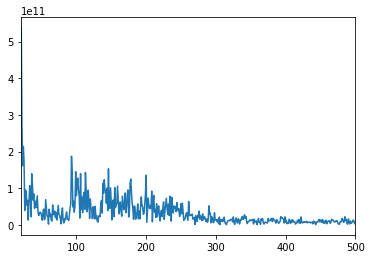

[-2.27562414e+08+0.00000000e+00j -1.16994228e+10+5.97107359e+09j
  2.74210998e+10-2.91330782e+08j ... -8.22983583e+09-1.16096445e+09j
  2.74210998e+10+2.91330782e+08j -1.16994228e+10-5.97107359e+09j]


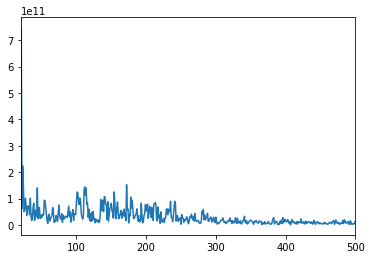

[-1.41968758e+10+0.00000000e+00j -5.79100926e+09-8.46801238e+09j
  3.06091001e+09-6.97983980e+09j ... -2.50690059e+09-1.17062965e+10j
  3.06091001e+09+6.97983980e+09j -5.79100926e+09+8.46801238e+09j]


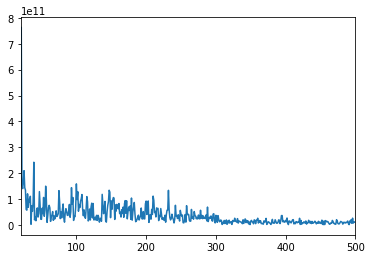

[-8.27596348e+09+0.00000000e+00j -2.62067927e+10+8.41686911e+09j
 -2.10627902e+10+3.30784462e+09j ... -7.16711856e+09+1.95150290e+10j
 -2.10627902e+10-3.30784462e+09j -2.62067927e+10-8.41686911e+09j]


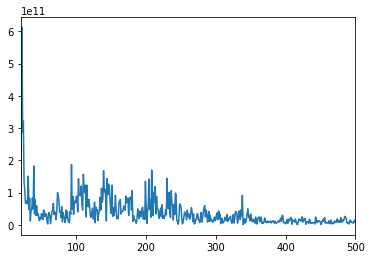

[1.56129495e+10+0.00000000e+00j 3.62727680e+10+7.89939175e+09j
 2.08334221e+10-1.16203168e+09j ... 1.87968816e+10-7.55120936e+09j
 2.08334221e+10+1.16203168e+09j 3.62727680e+10-7.89939175e+09j]


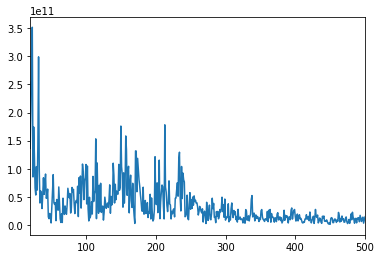

[-2.94802008e+10+0.00000000e+00j -4.62544357e+09+1.14558396e+10j
 -2.32343687e+10+3.24056576e+10j ... -1.69133896e+10+2.13954018e+09j
 -2.32343687e+10-3.24056576e+10j -4.62544357e+09-1.14558396e+10j]


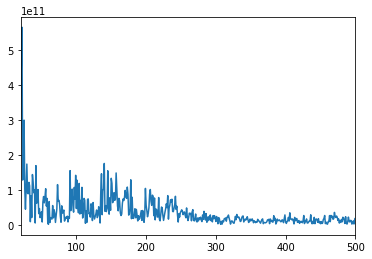

[ 8.71253074e+09+0.00000000e+00j -3.79816236e+09-8.47355956e+09j
 -7.38998053e+09-1.73959481e+10j ...  4.89801029e+09-9.01182014e+09j
 -7.38998053e+09+1.73959481e+10j -3.79816236e+09+8.47355956e+09j]


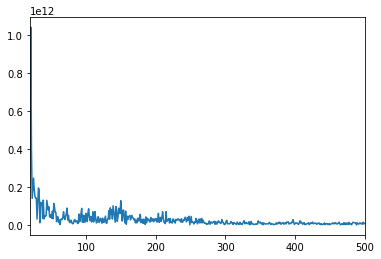

[-3.48397532e+10+0.00000000e+00j -2.28217486e+09+1.21025087e+10j
 -1.61553591e+10-4.17282991e+09j ... -1.49638892e+09+3.83717443e+10j
 -1.61553591e+10+4.17282991e+09j -2.28217486e+09-1.21025087e+10j]


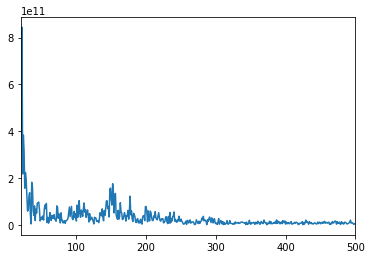

[4.10684975e+10+0.00000000e+00j 4.28221552e+10-1.51730553e+10j
 2.70513446e+10+2.02970970e+10j ... 4.80212373e+10-1.00472455e+10j
 2.70513446e+10-2.02970970e+10j 4.28221552e+10+1.51730553e+10j]


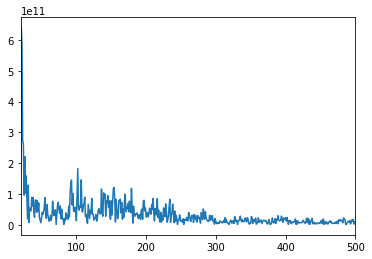

[-2.73781173e+10+0.00000000e+00j -3.50580353e+10+2.64192699e+09j
 -3.08344386e+10-3.24251553e+10j ... -3.57951768e+10+1.78502272e+10j
 -3.08344386e+10+3.24251553e+10j -3.50580353e+10-2.64192699e+09j]


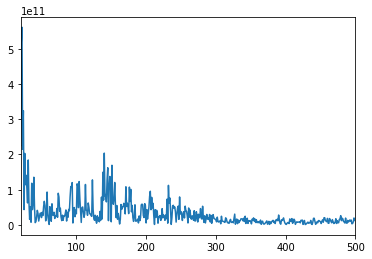

[-2.06854673e+09+0.00000000e+00j -7.94511757e+09-4.15457222e+10j
 -4.58465739e+09+6.12020220e+09j ... -1.12371549e+10-2.64235249e+10j
 -4.58465739e+09-6.12020220e+09j -7.94511757e+09+4.15457222e+10j]


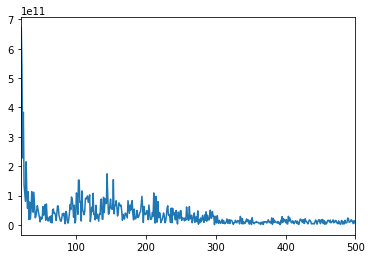

[-1.50177146e+09+0.00000000e+00j -2.19586590e+10-1.01034186e+10j
 -2.97559804e+08+7.52303560e+09j ... -1.62215493e+10+1.06414554e+10j
 -2.97559804e+08-7.52303560e+09j -2.19586590e+10+1.01034186e+10j]


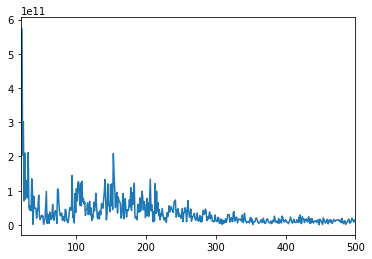

[6.49560636e+10+0.00000000e+00j 5.06863316e+10+2.38538189e+09j
 3.70193322e+10+1.16798063e+10j ... 7.80622465e+10+2.25444242e+10j
 3.70193322e+10-1.16798063e+10j 5.06863316e+10-2.38538189e+09j]


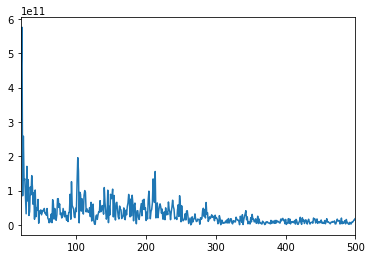

[-4.58590157e+10+0.00000000e+00j -7.35459787e+10-3.33853105e+10j
 -3.15995551e+10-5.52752999e+09j ... -5.01855570e+10-9.29132931e+09j
 -3.15995551e+10+5.52752999e+09j -7.35459787e+10+3.33853105e+10j]


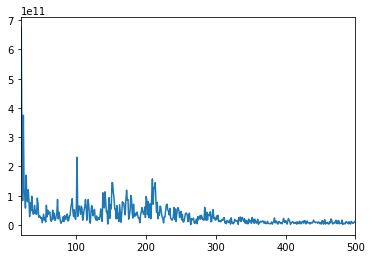

[1.29358951e+10+0.00000000e+00j 2.23060001e+10-1.64730635e+10j
 2.32294764e+10-1.46465905e+10j ... 2.93499430e+10+1.73191163e+10j
 2.32294764e+10+1.46465905e+10j 2.23060001e+10+1.64730635e+10j]


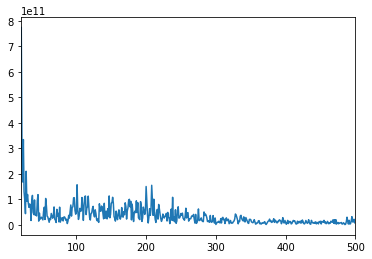

[7.56869264e+09+0.00000000e+00j 1.08859964e+10+2.18880415e+09j
 2.01809462e+10-7.64938402e+09j ... 8.36005695e+09-3.40860533e+09j
 2.01809462e+10+7.64938402e+09j 1.08859964e+10-2.18880415e+09j]


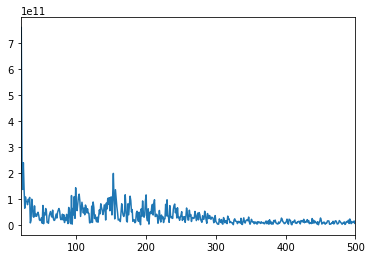

[-7.41941554e+09+0.00000000e+00j -3.38406455e+10-2.40505921e+10j
 -9.68995796e+09+2.91024612e+09j ... -3.59322492e+10-3.24880405e+10j
 -9.68995796e+09-2.91024612e+09j -3.38406455e+10+2.40505921e+10j]


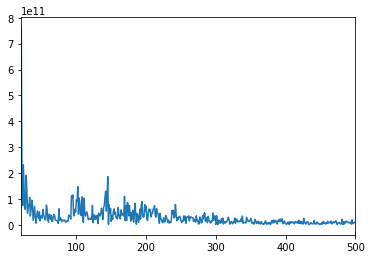

[ 4.09782011e+10+0.00000000e+00j  3.76728687e+10-4.26030313e+09j
 -3.92745998e+09-3.88067991e+09j ...  2.82739925e+10+6.61879021e+08j
 -3.92745998e+09+3.88067991e+09j  3.76728687e+10+4.26030313e+09j]


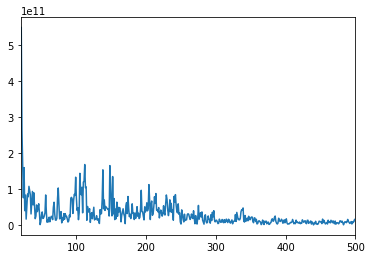

[-4.27716214e+09+0.00000000e+00j  6.45294380e+09+1.30607907e+09j
 -2.76804229e+10-1.94858803e+09j ... -1.93124573e+10-1.89799727e+10j
 -2.76804229e+10+1.94858803e+09j  6.45294380e+09-1.30607907e+09j]


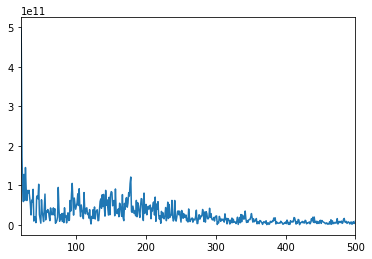

[ 6.05362702e+09+0.00000000e+00j -2.16314931e+09-9.59742886e+09j
  9.19118464e+09+1.76593416e+09j ...  6.84792457e+09+2.17718366e+10j
  9.19118464e+09-1.76593416e+09j -2.16314931e+09+9.59742886e+09j]


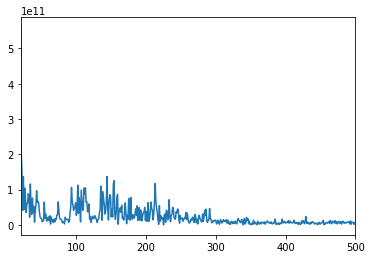

[-7.81801852e+09+0.00000000e+00j  1.84788791e+08+2.74177674e+08j
 -3.82146116e+10+6.03811978e+09j ... -1.36714782e+09+2.18810314e+10j
 -3.82146116e+10-6.03811978e+09j  1.84788791e+08-2.74177674e+08j]


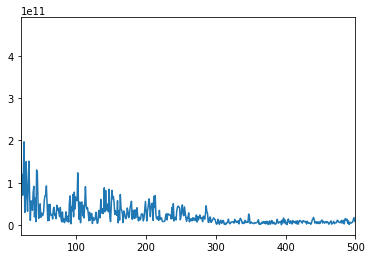

[-8.19056462e+09+0.00000000e+00j  1.60937103e+10+9.98747474e+09j
  1.03949083e+10+7.06584252e+09j ... -2.03440242e+10+3.41576853e+09j
  1.03949083e+10-7.06584252e+09j  1.60937103e+10-9.98747474e+09j]


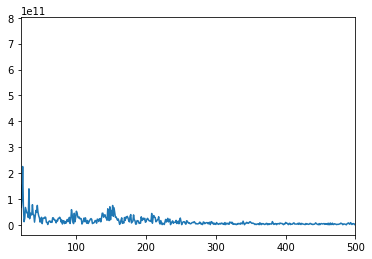

[-4.28950431e+10+0.00000000e+00j -2.15328473e+10+2.71337537e+09j
 -3.35761362e+10+1.10523515e+10j ... -1.94264153e+10+1.64051866e+10j
 -3.35761362e+10-1.10523515e+10j -2.15328473e+10-2.71337537e+09j]


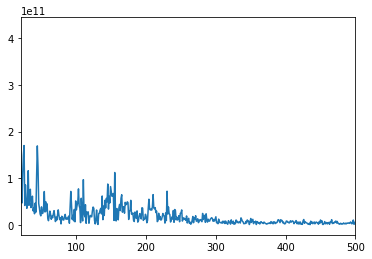

[2.67523510e+10+0.00000000e+00j 4.69459274e+10-1.15637609e+10j
 5.62759803e+10-6.24412789e+08j ... 3.69938414e+10-8.61149900e+09j
 5.62759803e+10+6.24412789e+08j 4.69459274e+10+1.15637609e+10j]


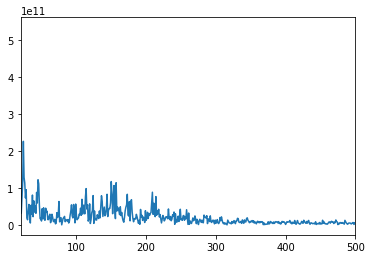

[-3.27243865e+09+0.00000000e+00j  6.05353726e+09+7.86916376e+09j
  2.90515610e+09+6.45803042e+09j ... -2.68428851e+10+1.13565419e+07j
  2.90515610e+09-6.45803042e+09j  6.05353726e+09-7.86916376e+09j]


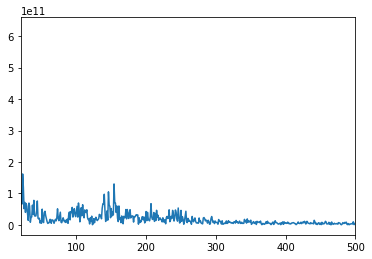

[-1.43289725e+10+0.00000000e+00j -1.06034680e+10-9.35830756e+09j
 -1.96027497e+10+4.73731665e+09j ... -1.92664916e+10+1.53095110e+10j
 -1.96027497e+10-4.73731665e+09j -1.06034680e+10+9.35830756e+09j]


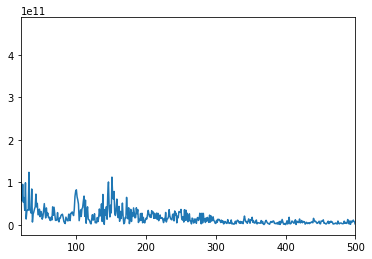

[3.42379554e+10+0.00000000e+00j 1.97590329e+10-1.08670451e+10j
 1.64747319e+10+2.43641969e+09j ... 2.40384847e+10-1.57912252e+10j
 1.64747319e+10-2.43641969e+09j 1.97590329e+10+1.08670451e+10j]


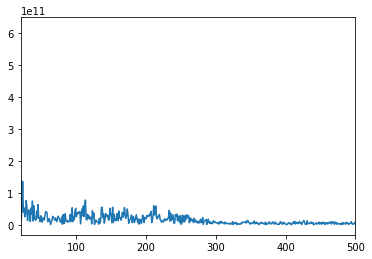

[-2.51354791e+09+0.00000000e+00j -7.33962223e+09+1.00515076e+10j
 -2.16108133e+10+6.39559587e+09j ... -2.40599679e+10+6.32393775e+09j
 -2.16108133e+10-6.39559587e+09j -7.33962223e+09-1.00515076e+10j]


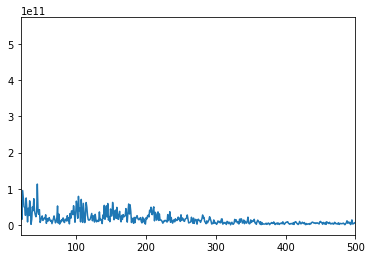

[6.38867035e+08+0.00000000e+00j 4.88702805e+09+1.42895673e+10j
 1.01946909e+10+4.69190603e+09j ... 1.86056234e+10+1.44208925e+10j
 1.01946909e+10-4.69190603e+09j 4.88702805e+09-1.42895673e+10j]


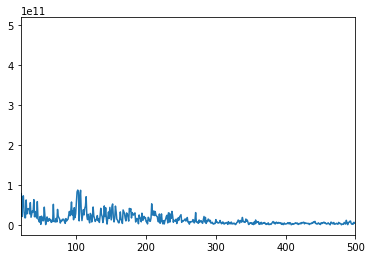

[-2.38668331e+09+0.00000000e+00j -1.24159787e+10+9.06723405e+09j
 -3.62743492e+08-1.00002979e+10j ...  1.56522658e+10-1.28832713e+10j
 -3.62743492e+08+1.00002979e+10j -1.24159787e+10-9.06723405e+09j]


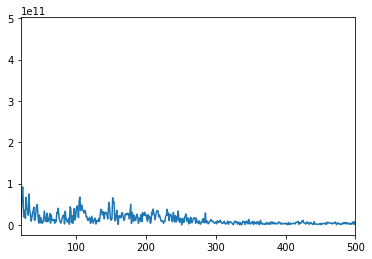

[1.29243021e+10+0.00000000e+00j 1.64176615e+09-5.79413780e+09j
 1.75861633e+10+1.81873692e+09j ... 1.43566400e+10+1.52278699e+10j
 1.75861633e+10-1.81873692e+09j 1.64176615e+09+5.79413780e+09j]


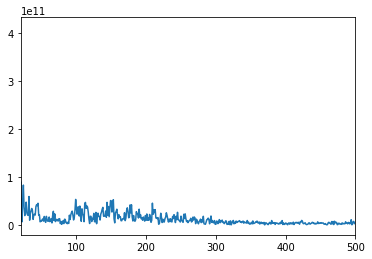

[-1.41392916e+10+0.00000000e+00j -7.44151784e+09-4.60109039e+09j
 -1.28200213e+10+8.90150248e+09j ... -2.08191981e+09+7.24289615e+09j
 -1.28200213e+10-8.90150248e+09j -7.44151784e+09+4.60109039e+09j]


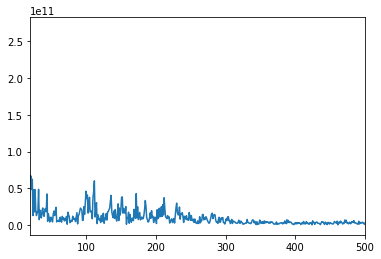

[-1.44073157e+08+0.00000000e+00j  7.15283859e+09+1.92682133e+09j
  6.70667765e+09-9.92575223e+08j ...  1.06600587e+09-5.04361509e+09j
  6.70667765e+09+9.92575223e+08j  7.15283859e+09-1.92682133e+09j]


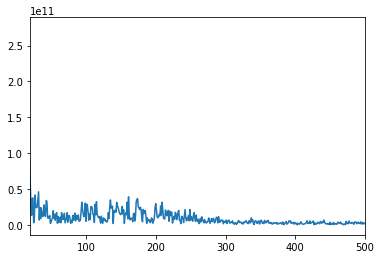

[-1.34119318e+09+0.00000000e+00j  2.75121167e+09-7.45401520e+08j
  1.05195990e+10-1.24889977e+09j ...  7.75013188e+09+9.55041408e+08j
  1.05195990e+10+1.24889977e+09j  2.75121167e+09+7.45401520e+08j]


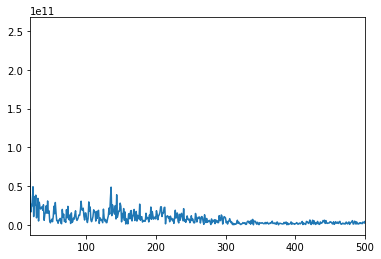

[ 1.46477140e+09+0.00000000e+00j -4.84983940e+09-3.94824420e+09j
 -6.82566101e+09+1.48216362e+09j ... -4.81563811e+09+1.17233514e+09j
 -6.82566101e+09-1.48216362e+09j -4.84983940e+09+3.94824420e+09j]


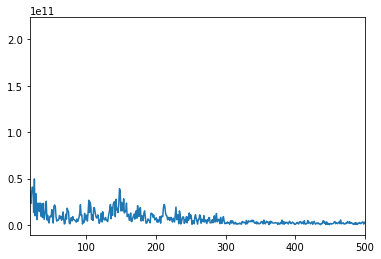

[ 3.39833804e+09+0.00000000e+00j -1.05741242e+09-2.27668654e+09j
 -4.96714048e+09-2.43637822e+09j ... -4.72717880e+09-1.64739790e+09j
 -4.96714048e+09+2.43637822e+09j -1.05741242e+09+2.27668654e+09j]


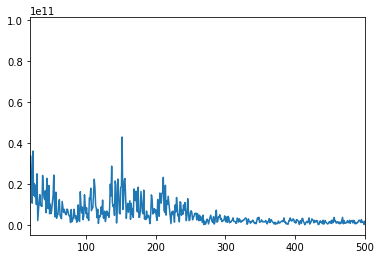

[6.87692210e+07+0.00000000e+00j 7.12741356e+08+3.53988884e+09j
 4.53572855e+09-1.40644870e+09j ... 2.33636777e+09+2.28505435e+09j
 4.53572855e+09+1.40644870e+09j 7.12741356e+08-3.53988884e+09j]


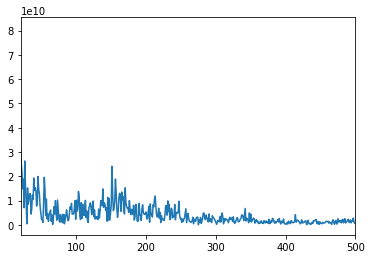

[6.73484949e+08+0.00000000e+00j 2.60689522e+09+1.26597228e+09j
 1.29353457e+09+1.03984101e+09j ... 8.25279122e+08-2.37045936e+09j
 1.29353457e+09-1.03984101e+09j 2.60689522e+09-1.26597228e+09j]


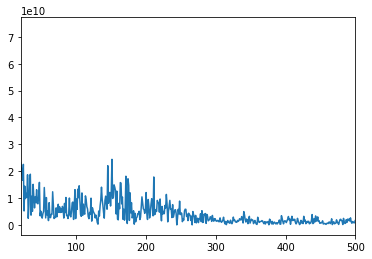

[ 5.46579213e+08+0.00000000e+00j  1.78172471e+09+2.73900448e+09j
 -4.17879304e+08-3.02729462e+08j ...  1.85514948e+09+8.18506888e+08j
 -4.17879304e+08+3.02729462e+08j  1.78172471e+09-2.73900448e+09j]


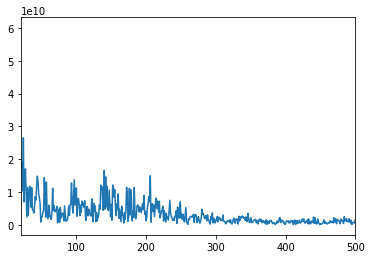

[-2.17341384e+09+9.68575478e-07j -6.16267188e+07+3.02005971e+09j
  3.04716251e+08-9.55404792e+08j ... -4.80371187e+07-1.66933413e+09j
  3.04716251e+08+9.55404792e+08j -6.16267188e+07-3.02005971e+09j]


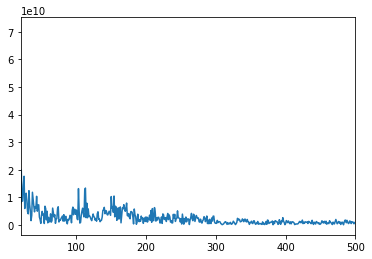

[5.73726002e+08+8.64267349e-07j 1.15981622e+08+1.46937714e+09j
 8.77922684e+08+7.32977535e+08j ... 1.99460848e+09-1.11181344e+09j
 8.77922684e+08-7.32977535e+08j 1.15981622e+08-1.46937714e+09j]


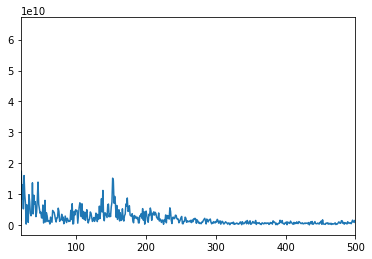

[-1.31784016e+08+1.51991844e-06j -1.81845293e+09+1.01477110e+09j
 -2.23842400e+09-1.17282492e+08j ...  4.39694882e+08+7.70807653e+07j
 -2.23842400e+09+1.17282492e+08j -1.81845293e+09-1.01477110e+09j]


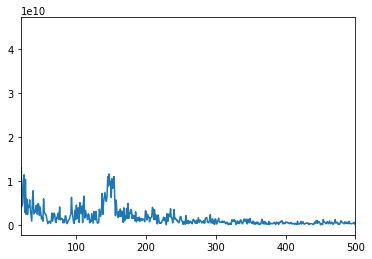

[6.85061408e+08+2.60770321e-07j 2.00515162e+08+5.62108103e+08j
 3.46194844e+08+3.45602663e+08j ... 3.41015121e+08-1.10650817e+09j
 3.46194844e+08-3.45602663e+08j 2.00515162e+08-5.62108103e+08j]


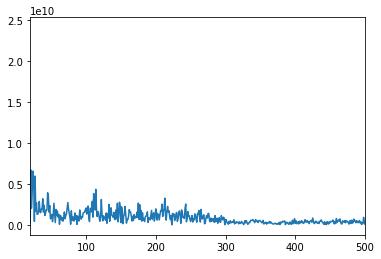

[7.57273483e+08+1.17346644e-07j 7.36921802e+08+4.35188622e+08j
 8.46923484e+08-8.28201780e+07j ... 6.14944312e+08-3.38991300e+08j
 8.46923484e+08+8.28201780e+07j 7.36921802e+08-4.35188622e+08j]


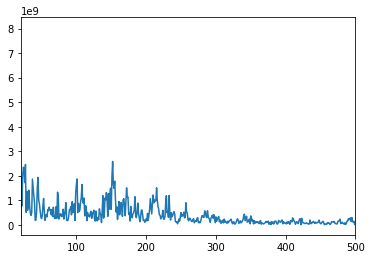

In [91]:
for frames in frames_list:
	X = fft(frames)
	print(X)
	plt.plot(range(len(X)), abs(X))
	plt.xlim(20, 500)
	plt.show()